In [ ]:
# OS setup
!cat /etc/os-release
!apt-get install -qq bc tree sox

# espnet setup
!git clone --depth 5 https://github.com/espnet/espnet
!pip install -q torch==1.5.1
!cd espnet; pip install -q -e .

# download pre-compiled warp-ctc and kaldi tools
!espnet/utils/download_from_google_drive.sh \
    "https://drive.google.com/open?id=13Y4tSygc8WtqzvAVGK_vRV9GlV7TRC0w" espnet/tools tar.gz > /dev/null
!cd espnet/tools/warp-ctc/pytorch_binding && \
    pip install -U dist/warpctc_pytorch-0.1.1-cp36-cp36m-linux_x86_64.whl

# make dummy activate
!mkdir -p espnet/tools/venv/bin && touch espnet/tools/venv/bin/activate
!echo "setup done."

NAME="Ubuntu"
VERSION="18.04.3 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.3 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic
Selecting previously unselected package libopencore-amrnb0:amd64.
(Reading database ... 144379 files and directories currently installed.)
Preparing to unpack .../0-libopencore-amrnb0_0.1.3-2.1_amd64.deb ...
Unpacking libopencore-amrnb0:amd64 (0.1.3-2.1) ...
Selecting previously unselected package libopencore-amrwb0:amd64.
Preparing to unpack .../1-libopencore-amrwb0_0.1.3-2.1_amd64.deb ...
Unpacking libopencore-amrwb0:amd64 (0.1.3-2.1) ...
Selecting previously unselected package libmagic-mgc.
Preparing to unpack .../2-libmagic-mgc_1%3a5.32-2ubuntu0.4_amd64.deb ...
Unpacking libmagic-mgc (1:5.32-2ubuntu0.4)

In [ ]:
# Importing data
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
dir_path = "/content/espnet/egs/telugu/asr1"

#Based on directory structure you may need to change espnet_zip_path, telugu_test_zip, telegu_train_zip
espnet_zip_path = "/content/drive/My Drive/telugu/telugu_espnet_data.zip"
telugu_test_zip = "/content/drive/My Drive/telugu/te-in-Test.zip"
telugu_train_zip = "/content/drive/My Drive/telugu/te-in-Train.zip"

# Making the required folders
!mkdir "/content/espnet/egs/telugu"
!mkdir "/content/espnet/egs/telugu/asr1"
!mkdir "/content/espnet/egs/telugu/asr1/wavdata"
!mkdir "/content/espnet/egs/telugu/asr1/wavdata/an4"
!mkdir "/content/espnet/egs/telugu/asr1/filterbank"

# Unzip all the files provided by maam
!unzip "$espnet_zip_path" -d "$dir_path"
# Unzip the audio(wav) dataset
!unzip "$telugu_test_zip" -d "$dir_path/wavdata/an4"
!unzip "$telugu_train_zip" -d "$dir_path/wavdata/an4"

In [ ]:
pip install numba==0.49.0


In [ ]:

import os
os.chdir("/content/espnet/tools")
!./install_chainer_ctc.sh

In [ ]:
import os
os.chdir("/content/espnet/egs/telugu/asr1")


# check files
!tree -L 1

.
├── filterbank
├── telugu_espnet_data
└── wavdata

3 directories, 0 files


In [ ]:
!mv telugu_espnet_data/* "./"
!chmod 755 run.sh
!sed -i -e 's/\r$//' run.sh
!ln -s ../../../tools/kaldi/egs/wsj/s5/steps steps
!ln -s ../../../tools/kaldi/egs/wsj/s5/utils utils

In [ ]:
!./run.sh --stage 1 --stop-stage 1

stage 1: Feature Generation
../../../tools/kaldi/egs/wsj/s5/steps/make_fbank_pitch.sh --cmd run.pl --nj 8 --write_utt2num_frames true data/test exp/make_fbank/test fbank
../../../tools/kaldi/egs/wsj/s5/steps/make_fbank_pitch.sh: moving data/test/feats.scp to data/test/.backup
utils/validate_data_dir.sh: Successfully validated data-directory data/test
../../../tools/kaldi/egs/wsj/s5/steps/make_fbank_pitch.sh: [info]: no segments file exists: assuming wav.scp indexed by utterance.
../../../tools/kaldi/egs/wsj/s5/steps/make_fbank_pitch.sh: Succeeded creating filterbank and pitch features for test
fix_data_dir.sh: kept all 3040 utterances.
fix_data_dir.sh: old files are kept in data/test/.backup
../../../tools/kaldi/egs/wsj/s5/steps/make_fbank_pitch.sh --cmd run.pl --nj 8 --write_utt2num_frames true data/train exp/make_fbank/train fbank
../../../tools/kaldi/egs/wsj/s5/steps/make_fbank_pitch.sh: moving data/train/feats.scp to data/train/.backup
utils/validate_data_dir.sh: Successfully valid

In [ ]:
!./run.sh --stage 2 --stop-stage 2

dictionary: data/lang_1char/train_nodev_units.txt
stage 2: Dictionary and Json Data Preparation
26 data/lang_1char/train_nodev_units.txt
/content/espnet/egs/telugu/asr1/../../../utils/data2json.sh --feat /content/espnet/egs/telugu/filterbank/train_nodev/deltafalse/feats.scp data/train_nodev data/lang_1char/train_nodev_units.txt
/content/espnet/egs/telugu/asr1/../../../utils/feat_to_shape.sh --cmd run.pl --nj 1 --filetype  --preprocess-conf  --verbose 0 /content/espnet/egs/telugu/filterbank/train_nodev/deltafalse/feats.scp data/train_nodev/tmp-VOfSv/input_1/shape.scp
/content/espnet/egs/telugu/asr1/../../../utils/data2json.sh --feat /content/espnet/egs/telugu/filterbank/train_dev/deltafalse/feats.scp data/train_dev data/lang_1char/train_nodev_units.txt
/content/espnet/egs/telugu/asr1/../../../utils/feat_to_shape.sh --cmd run.pl --nj 1 --filetype  --preprocess-conf  --verbose 0 /content/espnet/egs/telugu/filterbank/train_dev/deltafalse/feats.scp data/train_dev/tmp-x2hPh/input_1/shape.scp

In [ ]:
!./run.sh  --ngpu 1 --stage 3 --stop-stage 3

dictionary: data/lang_1char/train_nodev_units.txt
stage 3: LM Preparation
stage 4 completed


In [ ]:
!cat exp/train_rnnlm_chainer_false/train.log | grep perplexity

epoch       iteration   perplexity  val_perplexity  elapsed_time
2020-07-09 04:50:50,831 (lm:486) INFO: test perplexity: 3.7207740274012076


In [ ]:
!cat /content/espnet/egs/telugu/asr1/conf/train_mtlalpha0.5.yaml

# minibatch related
batch-size: 30
maxlen-in: 800  # if input length  > maxlen_in, batchsize is automatically reduced
maxlen-out: 150 # if output length > maxlen_out, batchsize is automatically reduced
# optimization related
sortagrad: 0 # Feed samples from shortest to longest ; -1: enabled for all epochs, 0: disabled, other: enabled for 'other' epochs
opt: adadelta
epochs: 100
patience: 3

# scheduled sampling option
sampling-probability: 0.0

# encoder related
etype: blstmp     # encoder architecture type
elayers: 4
eunits: 320
eprojs: 320
subsample: "1_2_2_1_1" # skip every n frame from input to nth layers
# decoder related
dlayers: 1
dunits: 300
# attention related
atype: location
adim: 320
aconv-chans: 10
aconv-filts: 100

# hybrid CTC/attention
mtlalpha: 0.5


# Report CER & WER
report-cer: true
report-wer: true


In [ ]:
!./run.sh  --ngpu 1 --stage 4 --stop-stage 4 --train-config conf/train_mtlalpha0.5.yaml

dictionary: data/lang_1char/train_nodev_units.txt
stage 4: Network Training
stage 4 completed


In [ ]:
!grep -e groundtruth -e prediction exp/train_nodev_chainer_train_mtlalpha0.5/train.log \
  | sed -e 's/<eos>//g' -e 's/<space>/ /g' | head -n 20

2020-07-09 04:51:20,573 (decoders:208) INFO: groundtruth[0]: SHUKRAWAARAQ UDAYAQ MAADXUGULA NIYOOJAKA WARGAQLOO WIWIDHA KAARYAAKRAMAALAKU HAAJARAINA MAQTRI AYYANNA PAATRUDXU MAATXLAADXUTUU MAQTRI GAQTXAA SHRIINIWAASARAAWUPAI PAROOKSHHAQGAA TIIWRA WIMARSHALU CEESHAARU
2020-07-09 04:51:20,573 (decoders:209) INFO: prediction [0]: SSSXMLMXMMMML<blank>MTMLML<blank>HMMWXXXXXXKRTTWWR<blank><blank><blank><blank><blank><blank><blank>PPLWWWGGRIYYYWGUMMMMMMMMMMMM<blank>MMMIWMM<blank><blank><blank>MPMM<blank>KMWMDDIPTTPMMMEBMMMMXTLXKHMMXXKXMXXXXXXXHPLXPPTPPPXXMMEMXKTTTTKWMMMMMMMMWXPI<blank>WPWWIYUWMWUMMIMPTKTPIKTJWPJDMKKKKSSSSPMMM
2020-07-09 04:51:20,580 (decoders:208) INFO: groundtruth[1]: BRAHMOOTSAWAALAKU AQKURAARPANXA ANAQTARAQ NAIRUTI MUULALOO UNNA WASAQTA MAQDXAPAANIKI CEERUKUNI BHUUMI PUUJA MRXTSYAQGRAHANXAQ CEESI PRADAKSHHANXAQGAA AALAYAQLOOKI PRAWEESHIQCAARU
2020-07-09 04:51:20,580 (decoders:209) INFO: prediction [1]: SSJMWHWWYYPMMM<blank>MMMGMLMLMMMMBMMMMMMMMMMMMML<blank>DMMMMTTTHTTK<bla

In [ ]:
!grep -e groundtruth -e prediction exp/train_nodev_chainer_train_mtlalpha0.5/train.log \
  | sed -e 's/<eos>//g' -e 's/<space>/ /g' | tail -n 20

2020-07-09 05:05:54,121 (decoders:208) INFO: groundtruth[0]: RUNXAMAAPHII WISHHAYAQLOO INNI KASHHTXAALU UQTXAAYANI CAQDRABAABU UUHIQCEE UUHIQCI UQDXANANNAARU
2020-07-09 05:05:54,121 (decoders:209) INFO: prediction [0]: AAKNA AA AA  PASHHAAAA OO AIAA WAAHHAXAA A PNDXUA ANI PEADXAAAA U WNDA CAE PDDA CA CDDXAAA IA  U
2020-07-09 05:05:54,124 (decoders:208) INFO: groundtruth[1]: MARNAADXU MADHYAAHNAQ WEELXAKI RAAJAAWAARI KOOTXAKI CEERUKUNNAADXU AYOOMAYAQ
2020-07-09 05:05:54,124 (decoders:209) INFO: prediction [1]: AAAAA  XU PAAXAAALAA  AAESAA U PAASAALAALA PAODXI U PEESA U NAARXU PAAO AAA  
2020-07-09 05:05:54,127 (decoders:208) INFO: groundtruth[2]: AQDUKEE AAYANA TXEKKALIKI CAALAA MUQDUGAANEE TANA ABHYARTHINI PRAKATXIQCAARU
2020-07-09 05:05:54,127 (decoders:209) INFO: prediction [2]: ARDX UE PARANA WAIEAA A I PEARAN PAQDX AA IE PAAA WAHAAAAAA A PAAAAAXI CIARU
2020-07-09 05:05:54,131 (decoders:208) INFO: groundtruth[3]: MIGATAA WAARU SIKKULU JAINULU BAUDDHULU ITARA MATASTHULU MATAANNI WELL

acc.png


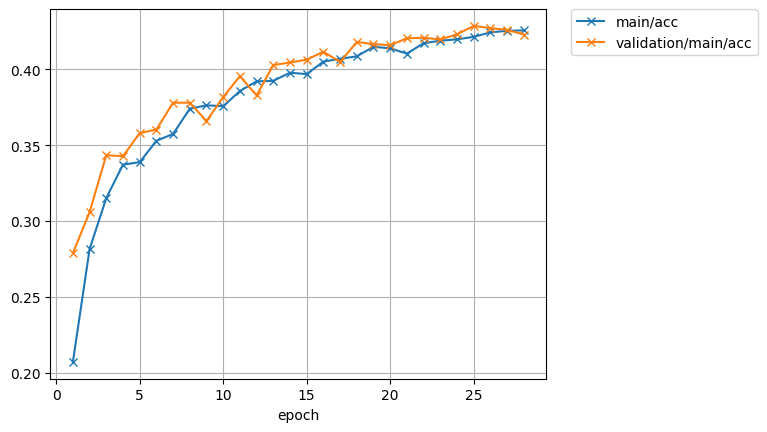

In [ ]:
import glob
from IPython.display import Image, display_png
expdir = "exp/train_nodev_chainer_train_mtlalpha0.5/results/"
for name in ["acc.png"]:
    print(name)
    display_png(Image(expdir + name, width=500))

In [ ]:
!cat conf/decode_ctcweight0.5.yaml

# decoding parameter
beam-size: 20
penalty: 0.0
maxlenratio: 0.0
minlenratio: 0.0
ctc-weight: 0.5
lm-weight: 1.0


In [ ]:
# WARNING: This code takes 6 minutes!
# Only recognize the test set
!sed -i.bak -e's/recog_set="train_dev test"/recog_set="test"/' run.sh
# run the actual recognition script
!./run.sh --stage 5 --decode-config conf/decode_ctcweight0.5.yaml --train-config conf/train_mtlalpha0.5.yaml

dictionary: data/lang_1char/train_nodev_units.txt
stage 4 completed
stage 5: Decoding
2020-07-09 05:06:16,196 (splitjson:43) INFO: /usr/bin/python3 /content/espnet/egs/telugu/asr1/../../../utils/splitjson.py --parts 8 /content/espnet/egs/telugu/filterbank/test/deltafalse/data.json
2020-07-09 05:06:16,337 (splitjson:55) INFO: number of utterances = 3040
2020-07-09 13:27:45,278 (concatjson:36) INFO: /usr/bin/python3 /content/espnet/egs/telugu/asr1/../../../utils/concatjson.py exp/train_nodev_chainer_train_mtlalpha0.5/decode_test_decode_ctcweight0.5_false/data.1.json exp/train_nodev_chainer_train_mtlalpha0.5/decode_test_decode_ctcweight0.5_false/data.2.json exp/train_nodev_chainer_train_mtlalpha0.5/decode_test_decode_ctcweight0.5_false/data.3.json exp/train_nodev_chainer_train_mtlalpha0.5/decode_test_decode_ctcweight0.5_false/data.4.json exp/train_nodev_chainer_train_mtlalpha0.5/decode_test_decode_ctcweight0.5_false/data.5.json exp/train_nodev_chainer_train_mtlalpha0.5/decode_test_decode_

!zip -r filterbank.zip /content/espnet/egs/telugu/filterbank/

In [ ]:
!zip -r exp.zip /content/espnet/egs/telugu/asr1/exp

In [ ]:
!cp /content/espnet/egs/telugu/asr1/exp.zip "/content/drive/My Drive/telugu/"